# ParallelBNs: Experimentos circular fusion

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (25,10)

In [6]:
df = pd.read_csv('results-circular-galgo-13-10.csv')
df['threads'] = pd.Categorical(df.threads)
df.drop(['seed','LL Score'], axis=1, inplace=True)
df

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,circular_ges,alarm,alarm.xbif50001246_,16,30,19,-57359.080276,44.0,10.0,34.0,16,19.853
1,circular_ges,alarm,alarm.xbif50001246_,2,10,16,-57398.228157,38.0,8.0,30.0,5,8.235
2,circular_ges,alarm,alarm.xbif50001246_,2,15,14,-57028.807106,32.0,4.0,28.0,5,8.104
3,circular_ges,alarm,alarm.xbif50001246_,2,20,16,-57390.295975,38.0,8.0,30.0,4,8.492
4,circular_ges,alarm,alarm.xbif50001246_,2,30,16,-57436.688789,38.0,8.0,30.0,4,9.918
...,...,...,...,...,...,...,...,...,...,...,...,...
3804,circular_ges,win95pts,win95pts.xbif_,8,15,152,-50704.464740,356.0,144.0,212.0,9,70.634
3805,circular_ges,win95pts,win95pts.xbif_,8,20,110,-50109.798642,246.0,66.0,180.0,13,89.863
3806,circular_ges,win95pts,win95pts.xbif_,8,30,128,-49844.717216,286.0,90.0,196.0,11,81.267
3807,circular_ges,win95pts,win95pts.xbif_,8,50,122,-50193.477648,266.0,90.0,176.0,10,67.547


## Fusión circular

Media de tiempo de ejecución

In [9]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "SHD", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

Total time(s)                                                         \
network         alarm        andes     barley    cancer     child earthquake   
threads                                                                        
0            7.563000  4683.362700  10.876700  0.278200  1.615000   0.280500   
2            8.145423  1688.730095  14.083634  0.425338  3.174211   0.489901   
4            8.058972   749.082800   7.730873  0.463859  3.767029   0.519543   
6           12.827635   944.252813  13.310378       NaN  5.740365        NaN   
8           10.580429   593.766716  10.003130       NaN  4.808208        NaN   
16          16.308200   640.306000  13.901000       NaN  6.521000        NaN   

                                                                  \
network hailfinder     hepar2  insurance          link    mildew   
threads                                                            
0        28.221500  24.179800   3.453800           NaN  2.908364   
2        24.721514  20.750192   5.640973  36083.395139  4.279622   
4        19.785829  14.343800   6.161174  14511.474877  4.075900   
6        33.130213  23.308066  10.406934  17923.950226  4.494882   
8        28.622740  18.335623   7.917974   9908.895725  3.280143   
16       42.812800  24.961000   9.965600           NaN  3.565500   

                                             
network          pigs     water    win95pts  
threads                                      
0                 NaN  2.626818  106.000800  
2        30217.665018  3.691824   90.090257  
4        13059.602559  3.660471   59.938746  
6        16403.724971  5.408697  105.470014  
8         9155.516310  4.438896   74.529521  
16                NaN  5.126200   98.302250

BDeu

In [10]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "SHD", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

BDeu Score                                              \
network         alarm          andes         barley        cancer   
threads                                                             
0       -56818.786780 -477536.714657 -319001.249749 -10587.543587   
2       -57118.076763 -475811.693120 -319223.587371 -10595.812973   
4       -56950.853963 -475533.212279 -320014.806794 -10595.812973   
6       -56960.052607 -475567.348595 -323092.697239           NaN   
8       -57122.023932 -475699.213177 -323803.503154           NaN   
16      -57479.692284 -476350.969881 -326896.240181           NaN   

                                                                  \
network         child   earthquake     hailfinder         hepar2   
threads                                                            
0       -63435.948138 -2383.328728 -259337.373740 -165800.553506   
2       -63143.267088 -2389.146970 -259661.655528 -165821.593986   
4       -63535.334516 -2386.362590 -259601.679928 -165827.244177   
6       -63458.776892          NaN -259514.898512 -165836.965225   
8       -63294.230097          NaN -259409.457535 -165865.143167   
16      -63049.746013          NaN -259642.752278 -165955.561974   

                                                                  \
network     insurance          link         mildew          pigs   
threads                                                            
0       -71451.106085           NaN -273828.727170           NaN   
2       -71356.830482 -1.325326e+06 -273826.790360 -1.715248e+06   
4       -71350.111197 -1.330309e+06 -273835.230688 -1.714668e+06   
6       -71783.122069 -1.328476e+06 -274480.272591 -1.714577e+06   
8       -71429.356195 -1.333945e+06 -273835.008153 -1.714335e+06   
16      -71407.802838           NaN -274184.710266           NaN   

                                     
network         water      win95pts  
threads                              
0       -67122.437032 -49908.603588  
2       -67158.137699 -49907.813875  
4       -67138.831130 -50092.877685  
6       -67185.307279 -50098.368577  
8       -67148.611967 -50235.006190  
16      -67155.926034 -50165.873965

Número de ejecuciones

In [11]:
df_unstack.groupby(["network", "threads"]).count().unstack(0)

BDeu Score                                                         \
network      alarm andes barley cancer child earthquake hailfinder hepar2   
threads                                                                     
0               10    10     10     10    10         10         10     10   
2               71    74     71     71    71         71         72     73   
4               71    70     71     71    70         70         70     70   
6               74    75     74      0    74          0         75     76   
8               77    74     77      0    77          0         77     77   
16               5     3      4      0     4          0          5      4   

                                                   
network insurance link mildew pigs water win95pts  
threads                                            
0              10    0     11    0    11       10  
2              74   36     74   57    74       74  
4              69   57     70   59    70       67  
6              76   53     76   69    76       72  
8              77   51     77   42    77       73  
16              5    0      4    0     5        4

### Tiempo de ejecución ``andes``:

In [16]:
df = pd.read_csv('results-circular-galgo-13-10.csv')
df['threads'] = pd.Categorical(df.threads)
df.drop(['seed','LL Score'], axis=1, inplace=True)
df

df2 = df[df["network"] == "andes"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
308,ges,andes,andes.xbif50001246_,0,0,189,-475936.383483,428.0,78.0,350.0,1,2298.463
309,circular_ges,andes,andes.xbif50001246_,2,10,170,-475121.373406,372.0,32.0,340.0,19,1607.139
310,circular_ges,andes,andes.xbif50001246_,2,15,191,-475697.229670,432.0,78.0,354.0,14,1513.056
311,circular_ges,andes,andes.xbif50001246_,2,20,190,-475712.367312,422.0,70.0,352.0,11,1634.365
312,circular_ges,andes,andes.xbif50001246_,2,30,178,-475449.159406,402.0,60.0,342.0,11,1482.279
...,...,...,...,...,...,...,...,...,...,...,...,...
609,circular_ges,andes,andes.xbif_,8,15,191,-476163.074365,436.0,74.0,362.0,11,471.684
610,circular_ges,andes,andes.xbif_,8,20,231,-477211.090910,508.0,74.0,434.0,12,526.590
611,circular_ges,andes,andes.xbif_,8,30,198,-476305.715479,440.0,72.0,368.0,13,574.232
612,circular_ges,andes,andes.xbif_,8,50,201,-476485.727805,452.0,100.0,352.0,10,550.425


Text(0.5, 1.0, 'BDeu en andes')

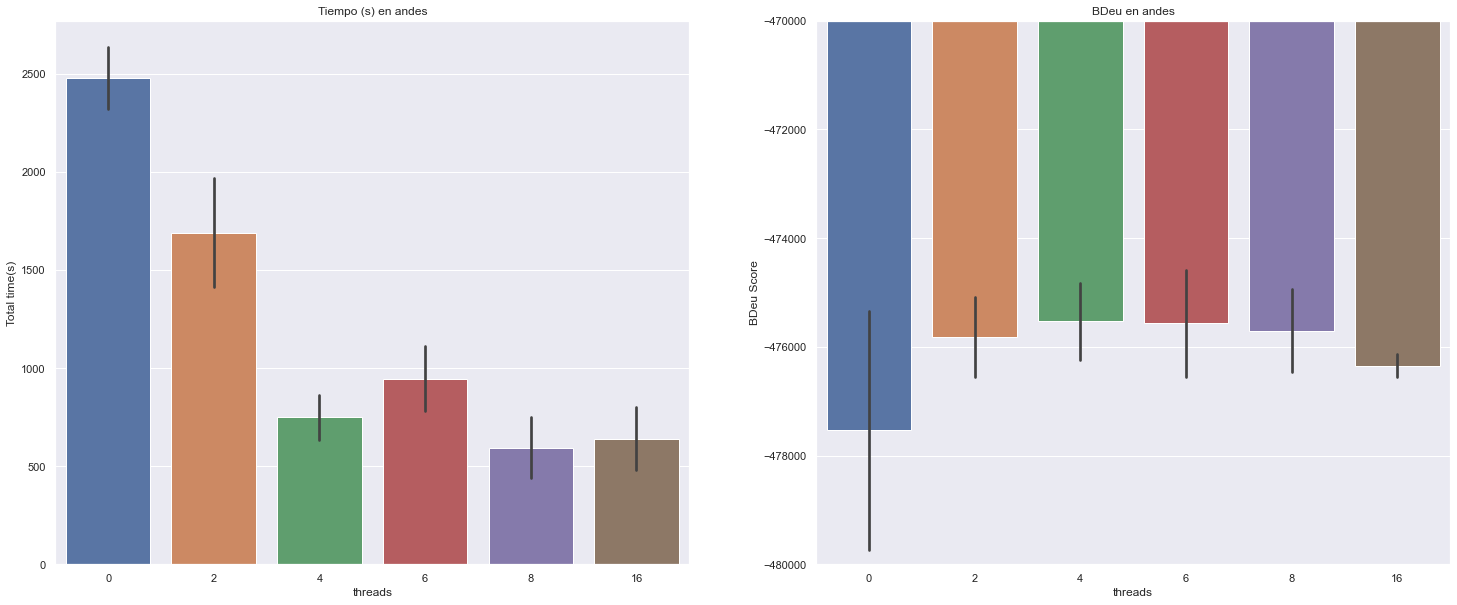

In [17]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-480000,-470000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en andes')
axs[1].set_title('BDeu en andes')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos (0 = GES)')

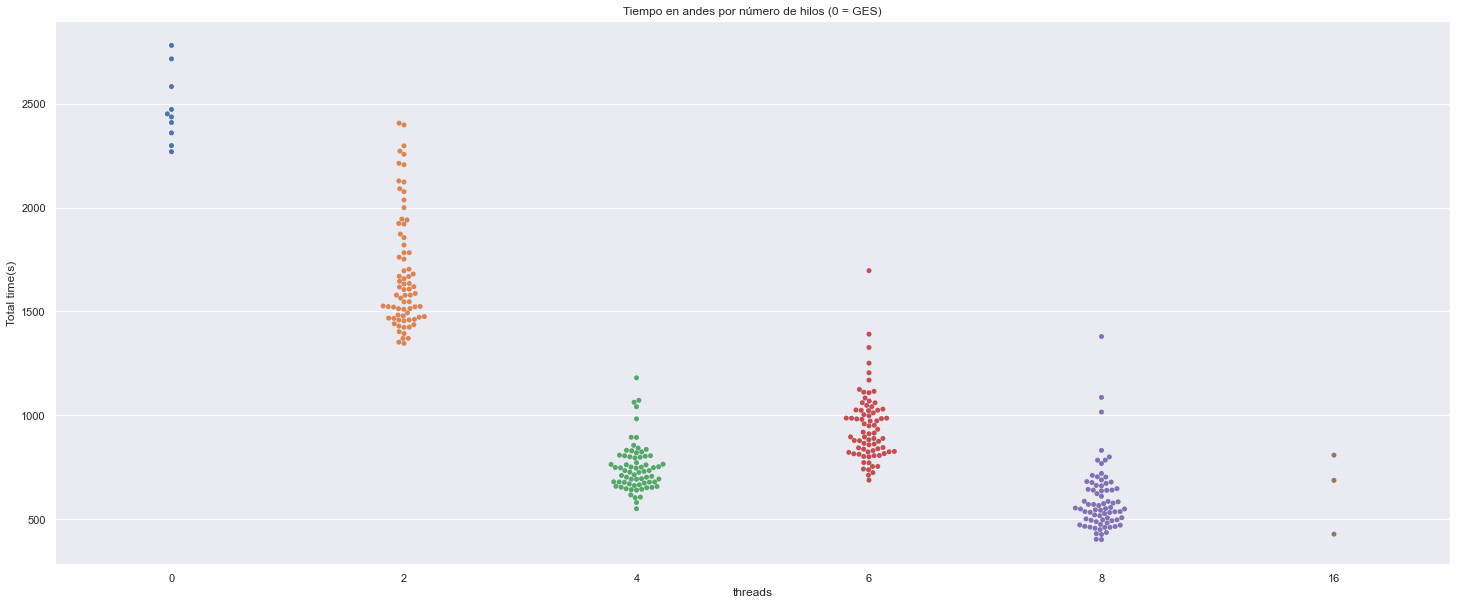

In [18]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en andes por número de hilos (0 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en andes por número de hilos (0 = GES)')

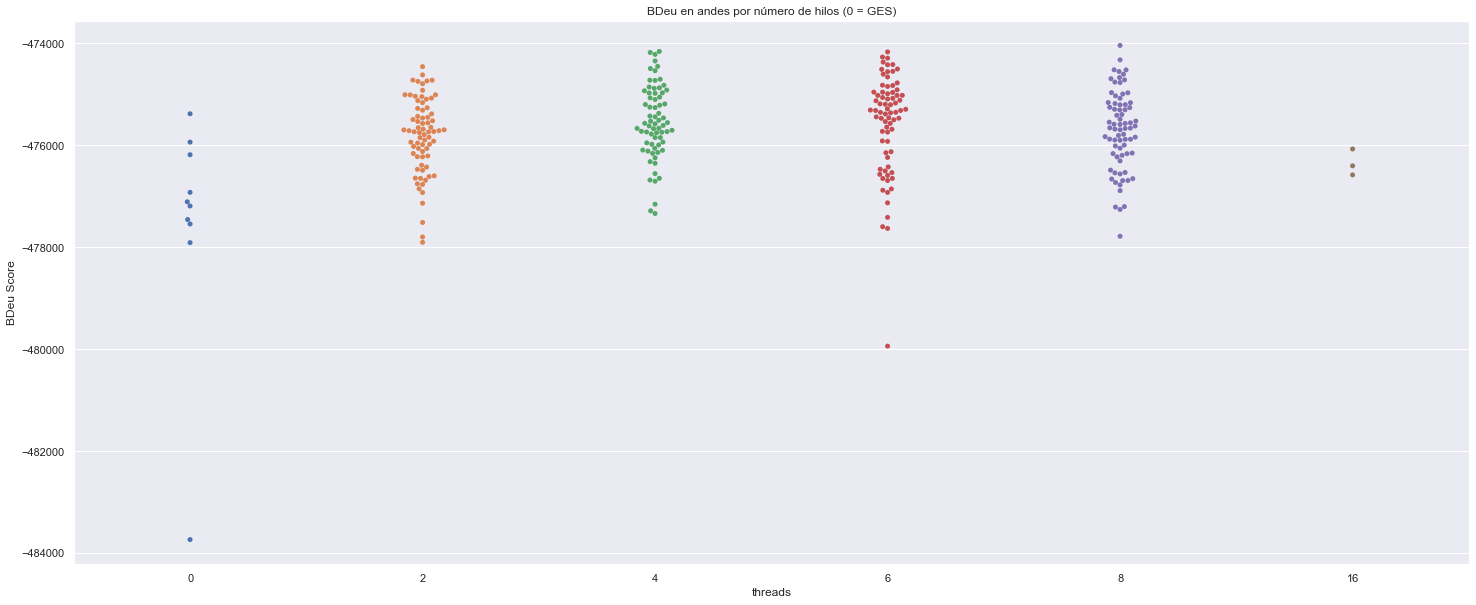

In [19]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en andes por número de hilos (0 = GES)')

### Tiempo de ejecución ``pigs``:

In [21]:
df2 = df[df["network"] == "pigs"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2969,circular_ges,pigs,pigs.xbif50001246_,2,10,20,-1.716191e+06,46.0,38.0,8.0,36,26832.753
2970,circular_ges,pigs,pigs.xbif50001246_,2,15,26,-1.719227e+06,58.0,32.0,26.0,24,27073.549
2971,circular_ges,pigs,pigs.xbif50001246_,2,30,11,-1.713181e+06,26.0,24.0,2.0,20,24664.754
2972,circular_ges,pigs,pigs.xbif50001246_,2,50,15,-1.714828e+06,36.0,32.0,4.0,12,25319.281
2973,circular_ges,pigs,pigs.xbif50001246_,4,10,12,-1.713775e+06,32.0,30.0,2.0,29,10723.885
...,...,...,...,...,...,...,...,...,...,...,...,...
3191,circular_ges,pigs,pigs.xbif_,6,5,4,-1.711266e+06,10.0,6.0,4.0,37,21277.207
3192,circular_ges,pigs,pigs.xbif_,8,10,7,-1.711790e+06,18.0,14.0,4.0,29,7312.315
3193,circular_ges,pigs,pigs.xbif_,8,15,11,-1.713208e+06,32.0,28.0,4.0,22,6292.047
3194,circular_ges,pigs,pigs.xbif_,8,30,12,-1.712827e+06,36.0,32.0,4.0,24,10138.187


Text(0.5, 1.0, 'BDeu en pigs')

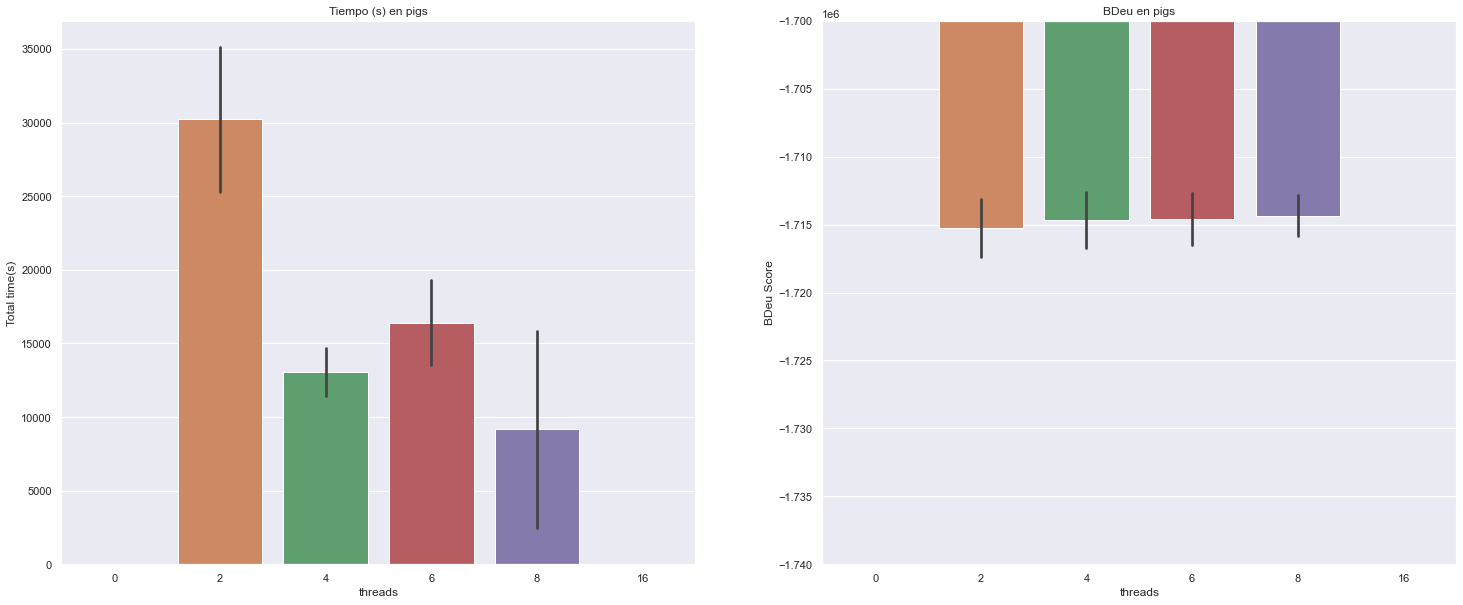

In [22]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1740000,-1700000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en pigs')
axs[1].set_title('BDeu en pigs')

Text(0.5, 1.0, 'Tiempo en pigs por número de hilos (0 = GES)')

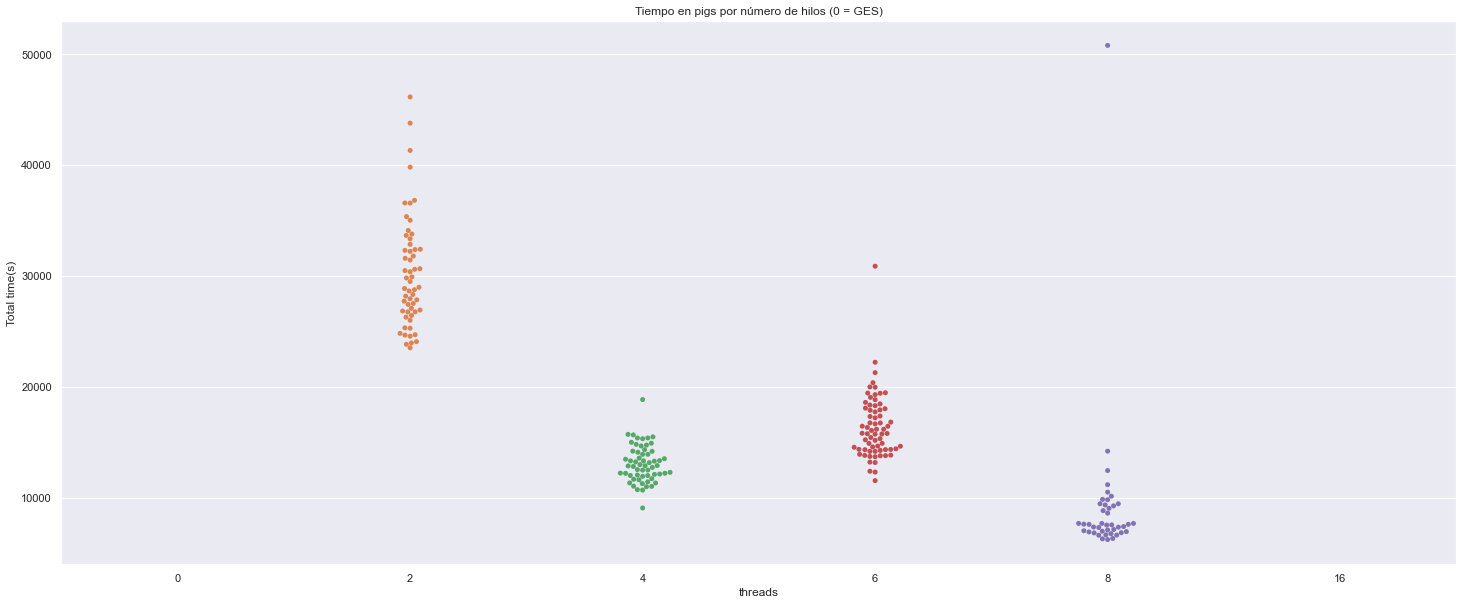

In [23]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en pigs por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en pigs por número de hilos (0 = GES)')

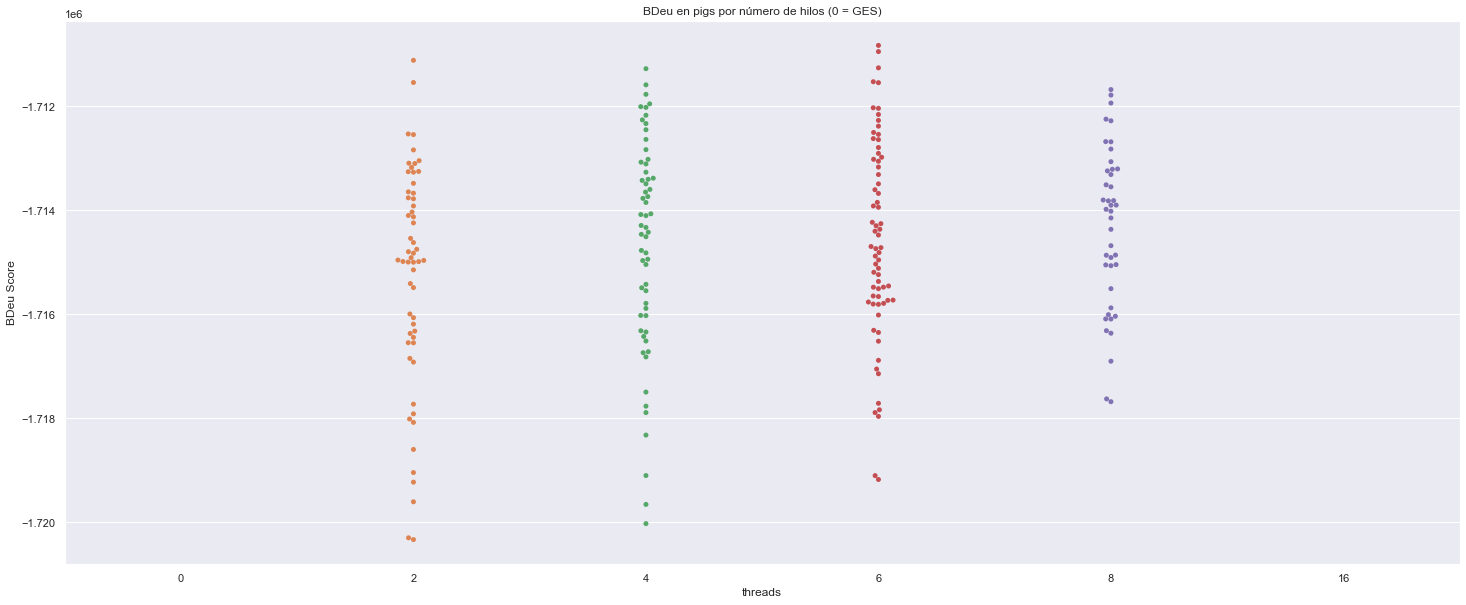

In [24]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en pigs por número de hilos (0 = GES)')

### Tiempo de ejecución ``link``:

In [33]:
df2 = df[df["network"] == "link"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
2460,circular_ges,link,link.xbif50001246_,2,10,972,-1.298870e+06,1984.0,544.0,1440.0,52,35010.797
2461,circular_ges,link,link.xbif50001246_,2,15,983,-1.307774e+06,2002.0,560.0,1442.0,36,33988.758
2462,circular_ges,link,link.xbif50001246_,2,30,1006,-1.321093e+06,2070.0,626.0,1444.0,20,33795.751
2463,circular_ges,link,link.xbif50001246_,2,50,1084,-1.347433e+06,2254.0,712.0,1542.0,14,30191.535
2464,circular_ges,link,link.xbif50001246_,4,10,998,-1.329460e+06,2062.0,644.0,1418.0,38,15617.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2652,circular_ges,link,link.xbif_,8,10,964,-1.295936e+06,2012.0,636.0,1376.0,27,7085.501
2653,circular_ges,link,link.xbif_,8,15,956,-1.293216e+06,1974.0,572.0,1402.0,22,7825.062
2654,circular_ges,link,link.xbif_,8,30,1012,-1.296443e+06,2110.0,622.0,1488.0,22,9388.227
2655,circular_ges,link,link.xbif_,8,50,1034,-1.309504e+06,2164.0,624.0,1540.0,42,20951.179


Text(0.5, 1.0, 'BDeu en link')

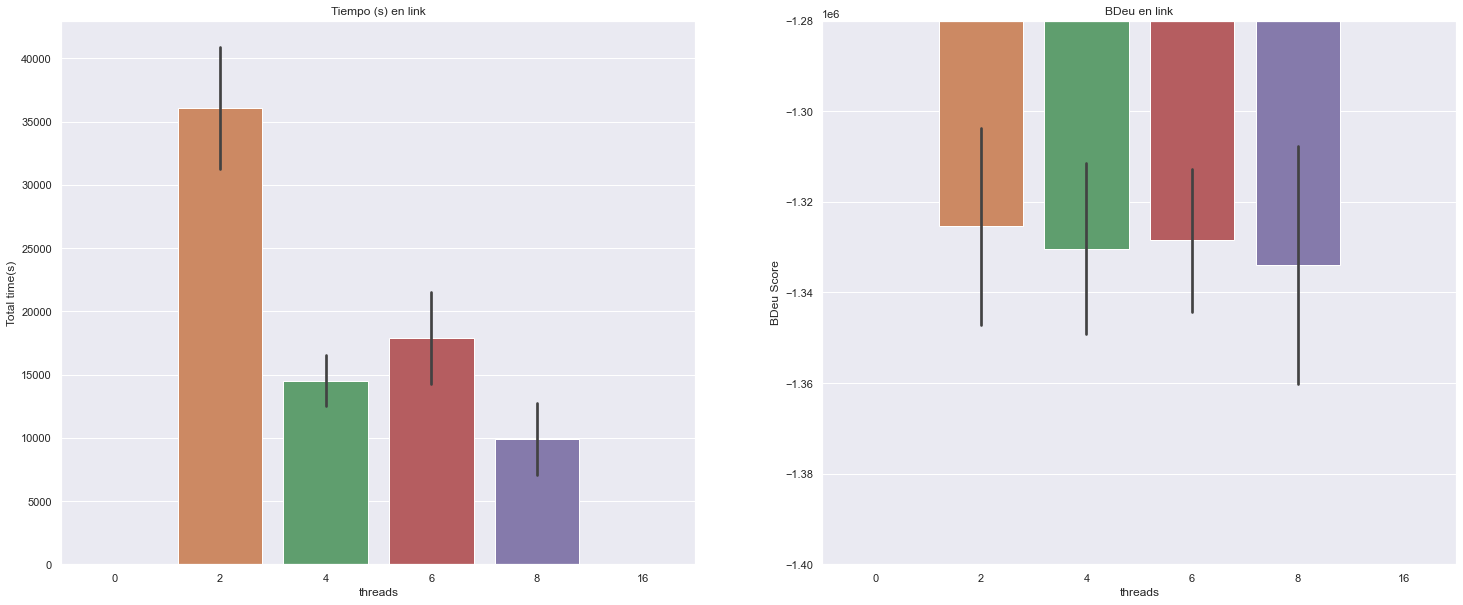

In [39]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-1400000,-1280000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en link')
axs[1].set_title('BDeu en link')

Text(0.5, 1.0, 'Tiempo en link por número de hilos (0 = GES)')

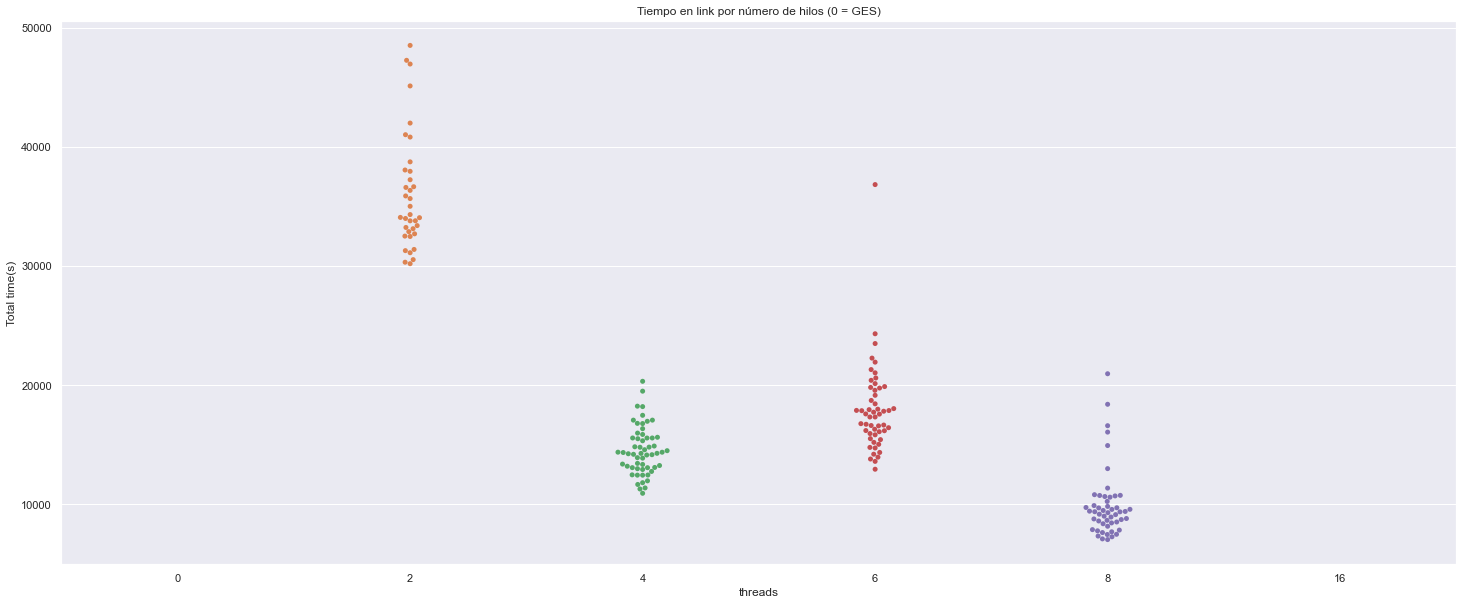

In [35]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en link por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en link por número de hilos (0 = GES)')

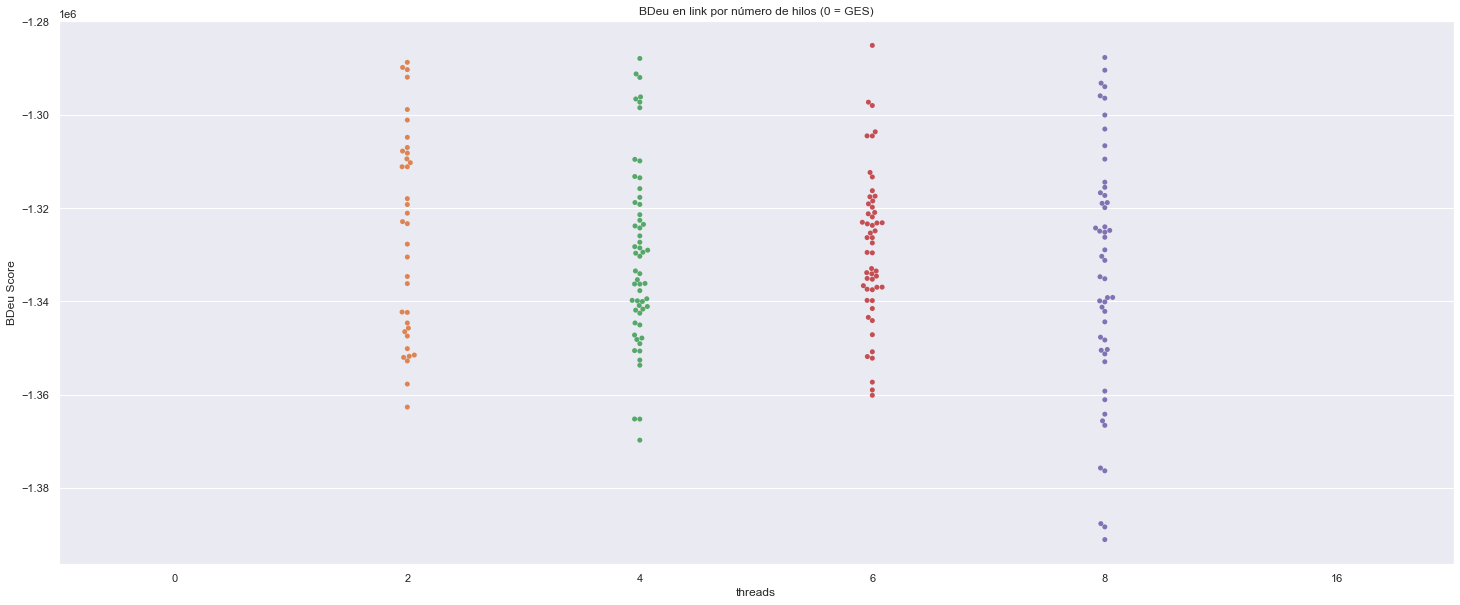

In [36]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en link por número de hilos (0 = GES)')

### Tiempo de ejecución ``win95pts``:

In [25]:
df2 = df[df["network"] == "win95pts"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
3509,ges,win95pts,win95pts.xbif50001246_,0,0,105,-50229.363522,238.0,74.0,164.0,1,92.156
3510,circular_ges,win95pts,win95pts.xbif50001246_,16,30,131,-50187.424898,290.0,94.0,196.0,15,123.184
3511,circular_ges,win95pts,win95pts.xbif50001246_,2,10,125,-49874.020312,276.0,92.0,184.0,10,91.249
3512,circular_ges,win95pts,win95pts.xbif50001246_,2,15,114,-49917.233502,258.0,80.0,178.0,9,88.628
3513,circular_ges,win95pts,win95pts.xbif50001246_,2,20,106,-49947.794280,238.0,68.0,170.0,6,88.673
...,...,...,...,...,...,...,...,...,...,...,...,...
3804,circular_ges,win95pts,win95pts.xbif_,8,15,152,-50704.464740,356.0,144.0,212.0,9,70.634
3805,circular_ges,win95pts,win95pts.xbif_,8,20,110,-50109.798642,246.0,66.0,180.0,13,89.863
3806,circular_ges,win95pts,win95pts.xbif_,8,30,128,-49844.717216,286.0,90.0,196.0,11,81.267
3807,circular_ges,win95pts,win95pts.xbif_,8,50,122,-50193.477648,266.0,90.0,176.0,10,67.547


Text(0.5, 1.0, 'BDeu en win95pts')

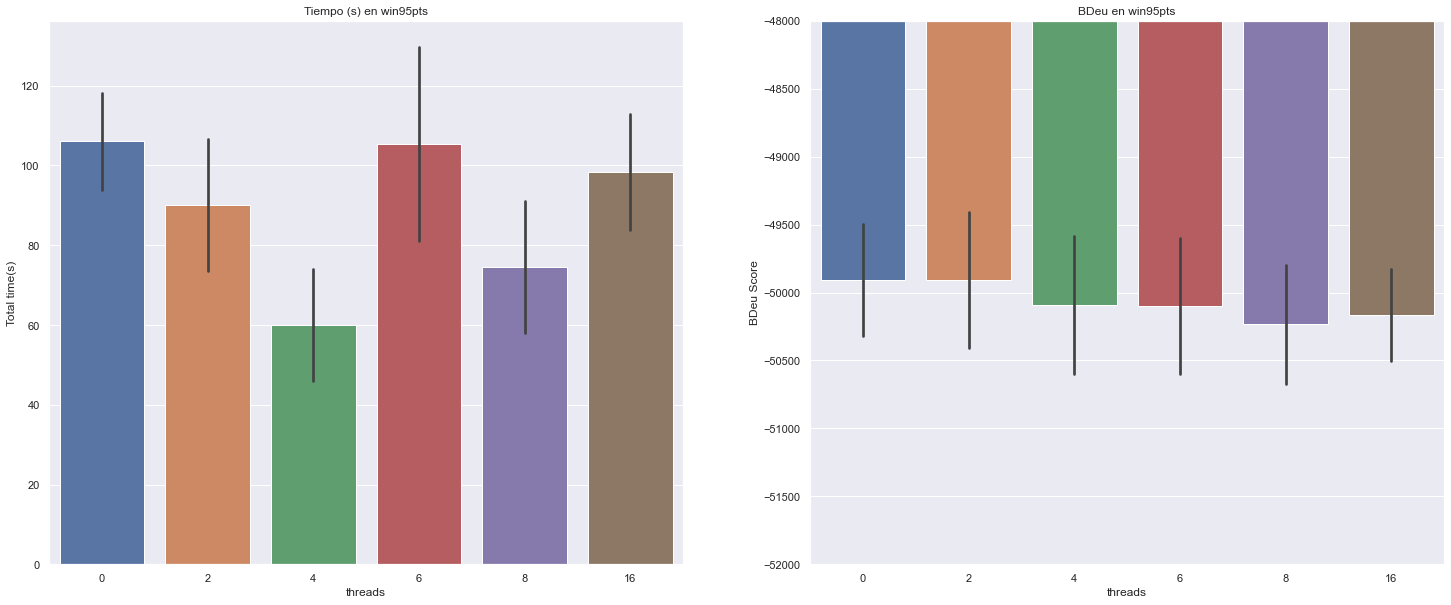

In [26]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en win95pts')
axs[1].set_title('BDeu en win95pts')

Text(0.5, 1.0, 'Tiempo en win95pts por número de hilos (0 = GES)')

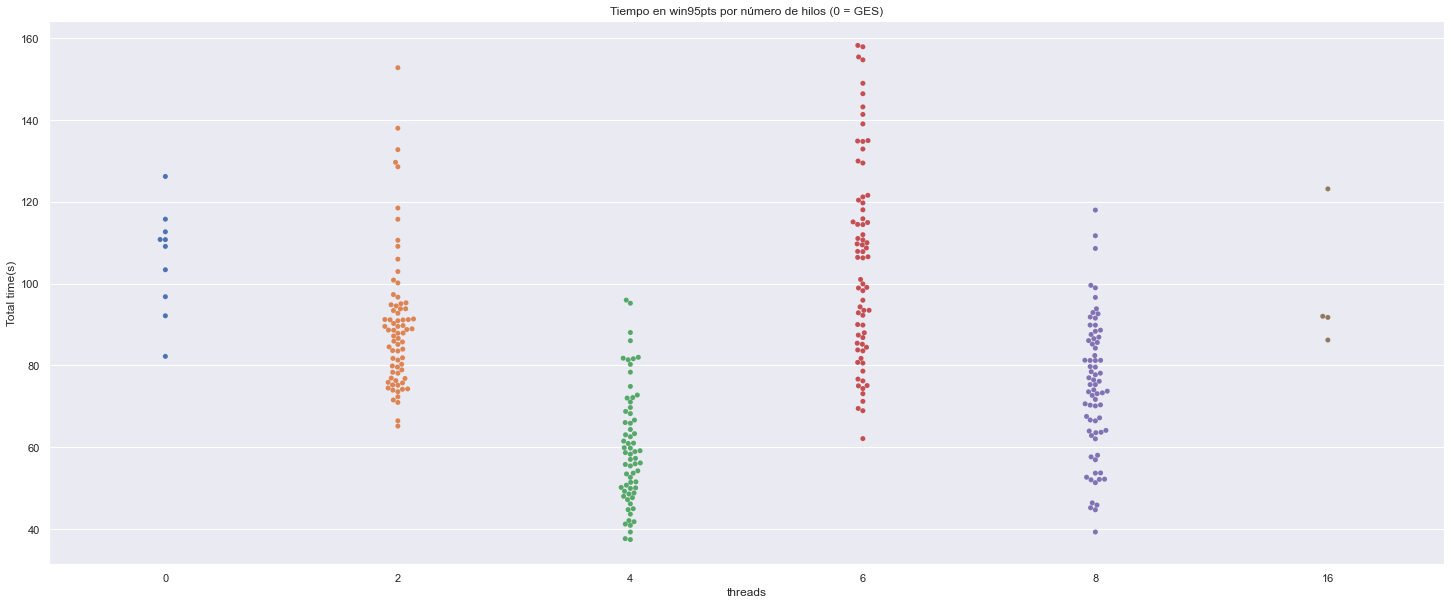

In [27]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en win95pts por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en win95pts por número de hilos (0 = GES)')

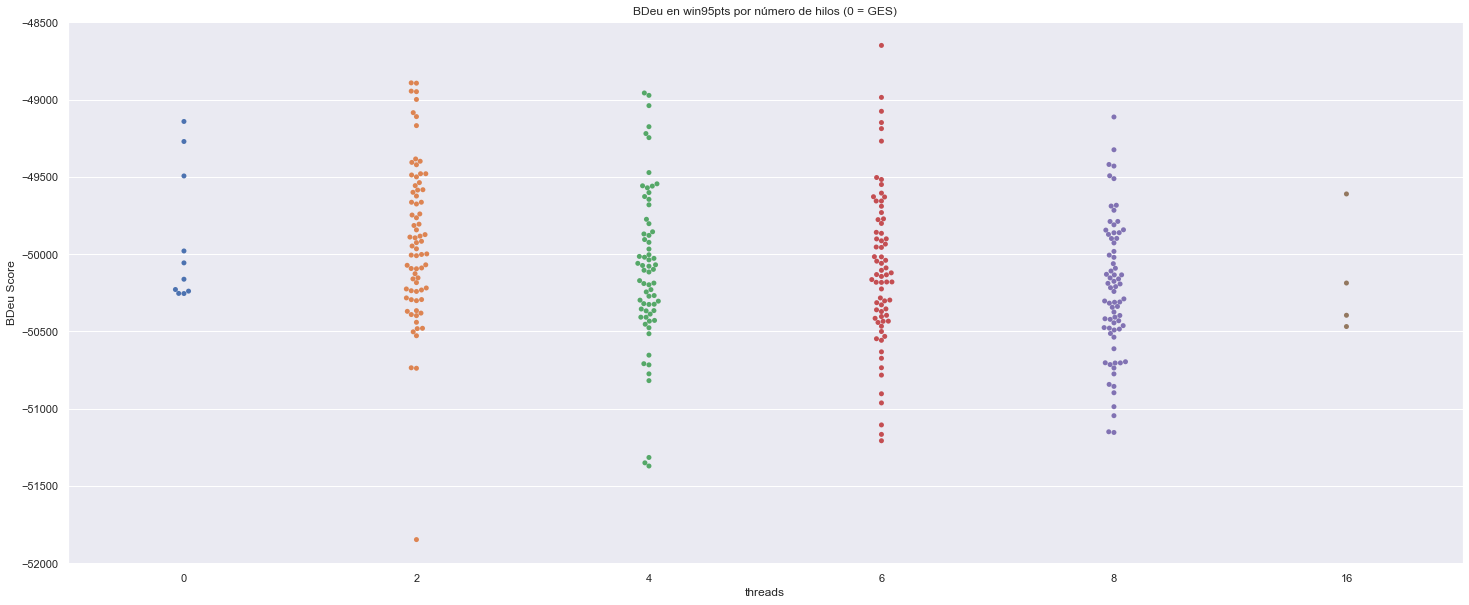

In [28]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en win95pts por número de hilos (0 = GES)')

### Tiempo de ejecución ``alarm``:

In [29]:
df2 = df[df["network"] == "alarm"]
df2

,algorithm,network,bbdd,threads,interleaving,SHD,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,circular_ges,alarm,alarm.xbif50001246_,16,30,19,-57359.080276,44.0,10.0,34.0,16,19.853
1,circular_ges,alarm,alarm.xbif50001246_,2,10,16,-57398.228157,38.0,8.0,30.0,5,8.235
2,circular_ges,alarm,alarm.xbif50001246_,2,15,14,-57028.807106,32.0,4.0,28.0,5,8.104
3,circular_ges,alarm,alarm.xbif50001246_,2,20,16,-57390.295975,38.0,8.0,30.0,4,8.492
4,circular_ges,alarm,alarm.xbif50001246_,2,30,16,-57436.688789,38.0,8.0,30.0,4,9.918
...,...,...,...,...,...,...,...,...,...,...,...,...
303,circular_ges,alarm,alarm.xbif_,8,15,19,-57133.888400,44.0,10.0,34.0,7,8.509
304,circular_ges,alarm,alarm.xbif_,8,20,19,-57427.352941,44.0,8.0,36.0,10,11.014
305,circular_ges,alarm,alarm.xbif_,8,30,19,-57427.352941,44.0,8.0,36.0,10,10.226
306,circular_ges,alarm,alarm.xbif_,8,50,19,-57427.352941,44.0,8.0,36.0,10,11.072


Text(0.5, 1.0, 'BDeu en alarm')

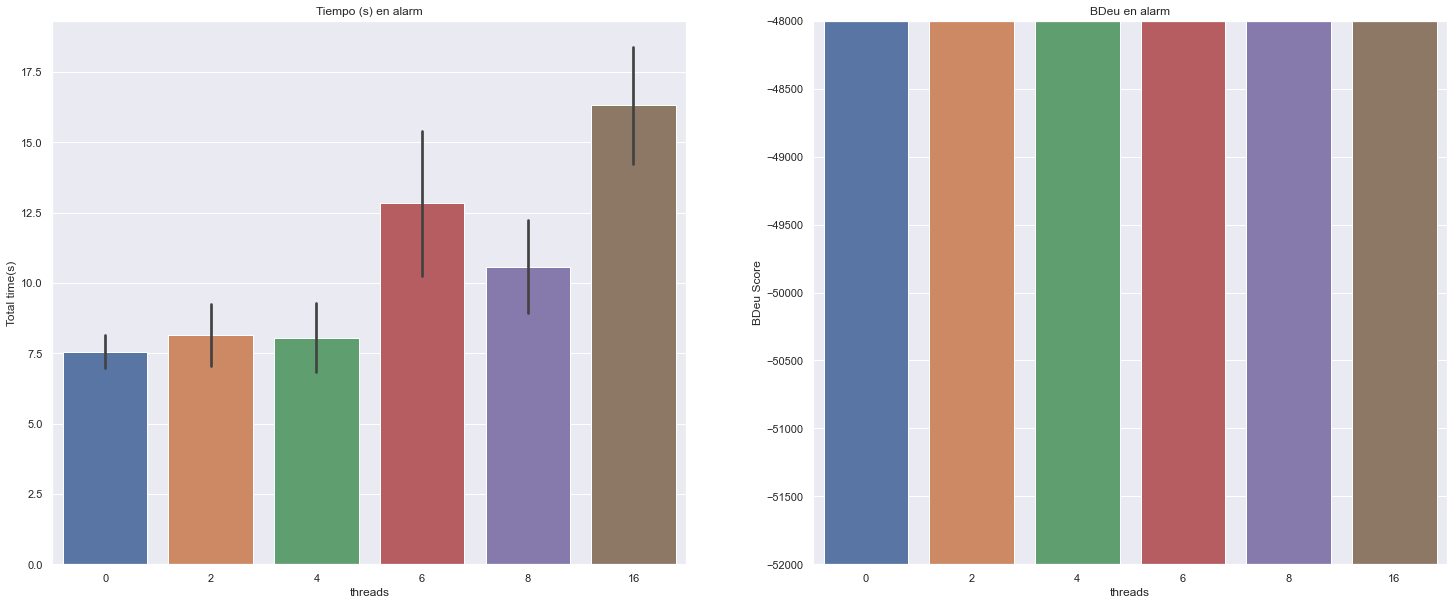

In [30]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], ci='sd')
plt.ylim(-52000,-48000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], ci='sd')
axs[0].set_title('Tiempo (s) en alarm')
axs[1].set_title('BDeu en alarm')

Text(0.5, 1.0, 'Tiempo en alarm por número de hilos (0 = GES)')

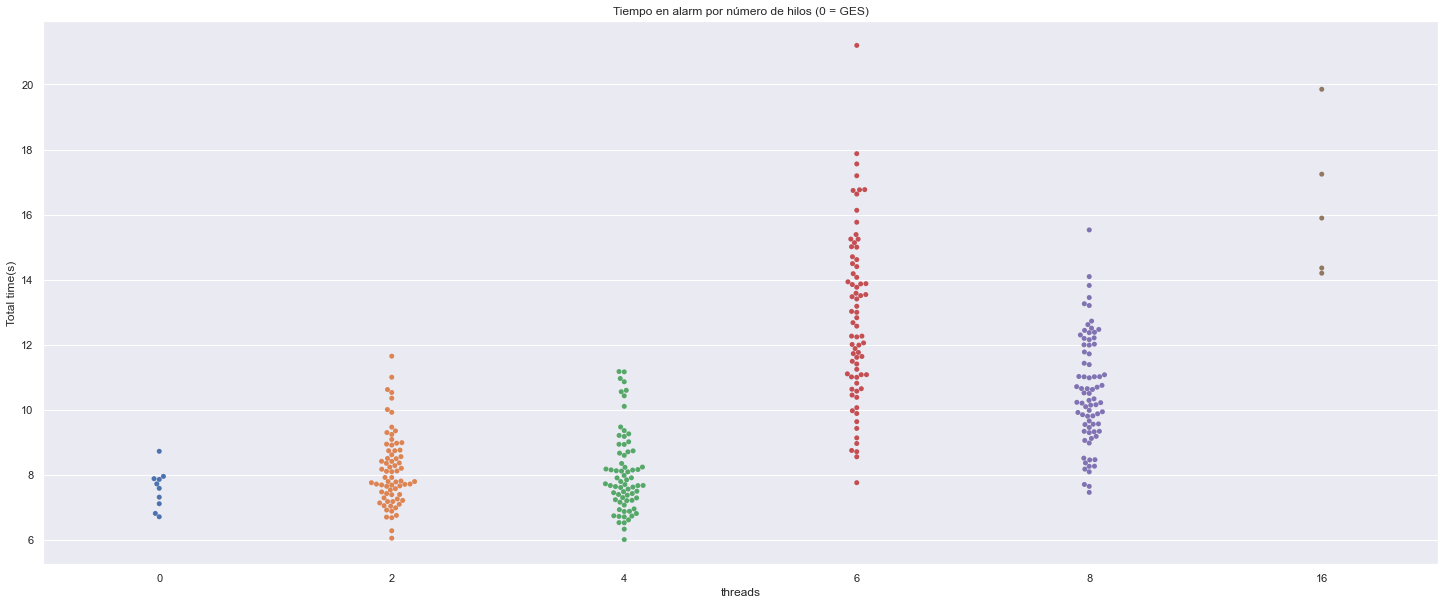

In [31]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en alarm por número de hilos (0 = GES)')

Text(0.5, 1.0, 'BDeu en alarm por número de hilos (0 = GES)')

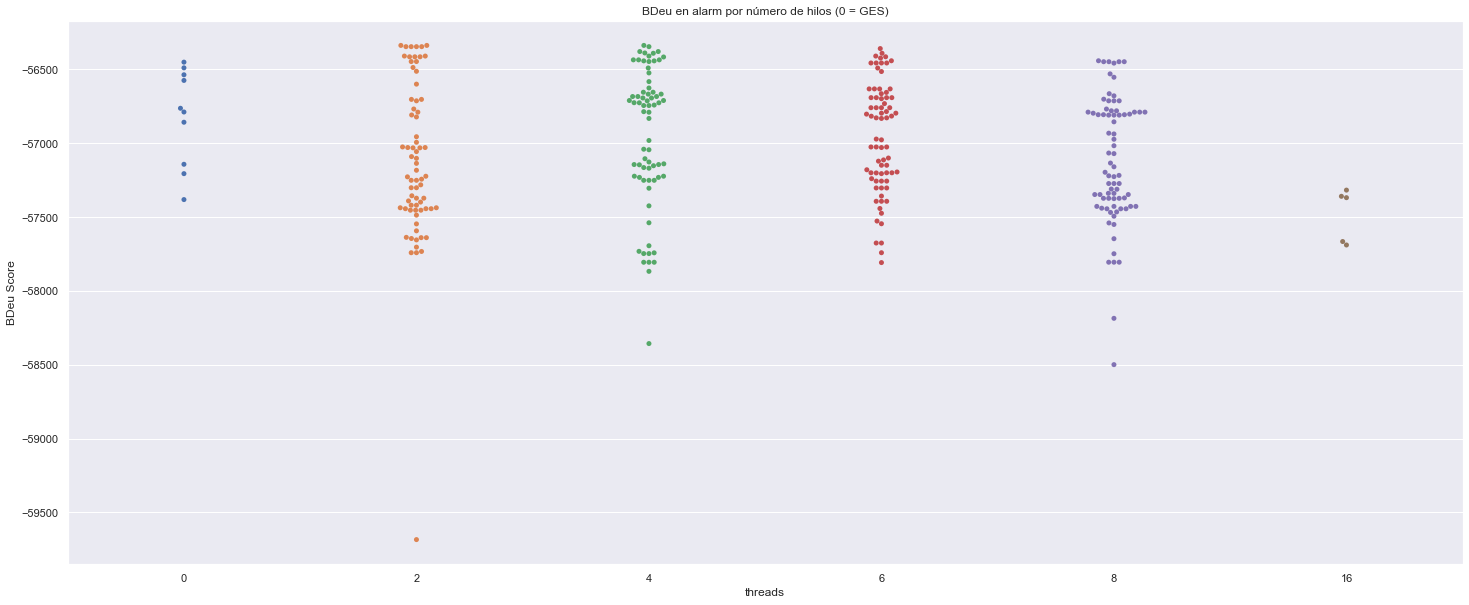

In [32]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en alarm por número de hilos (0 = GES)')